## Linear Attractor

## Import packages

In [1]:
import numpy as np
import scipy as sp
from src import py_msent
import matplotlib.pyplot as plt
import fathon
from fathon import fathonUtils as fu
import math
import os
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import nolds


## Linear attractor: ODEs and phase space

In [2]:
# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.
# Updated, January 2021 to use scipy.integrate.solve_ivp.

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 1, 100, 0
# sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1

# Maximum time point and total number of time points.
tmax, n = 40, 5000

def lorenz_lin(t, X, sigma,beta,rho):
    """The Lorenz equations."""
    u, v, w = X
    up = v
    vp = sigma*w 
    wp = -beta*v-rho*w
    return up, vp, wp

# Integrate the Lorenz equations.
soln = solve_ivp(lorenz_lin, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)

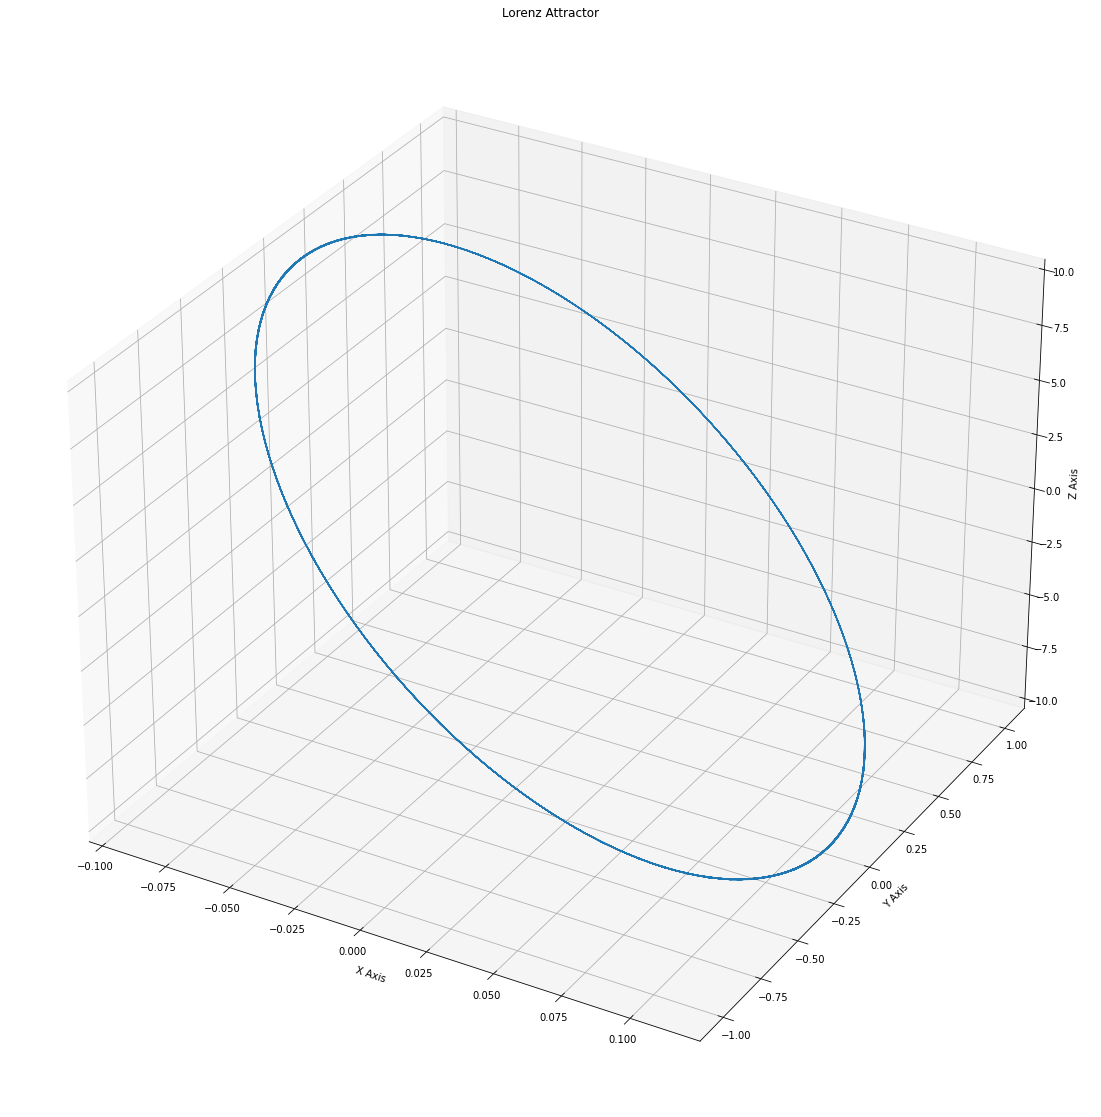

In [4]:
ax = plt.figure(figsize = (20,20)).add_subplot(projection='3d')

ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

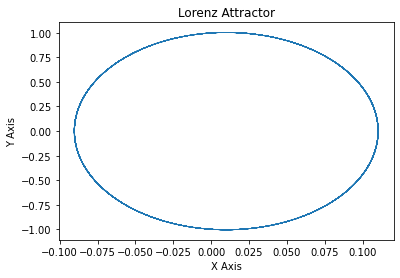

In [5]:
ax = plt.subplot()

ax.plot(x, y, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_title("Lorenz Attractor")
plt.show()

## Correlation dimension 

The Lorenz attractor is a strange attractor. Therefore, we can compute fractal dimension of the attractor area via correlation dimension. It is expected to be 2.06 according to Procaccia et al. 1983

In [23]:
sd_x= np.std(x, ddof=1)
rvals_vect = nolds.logarithmic_r(0.01 * sd_x, 1.0* sd_x, 1.03)
dim_corr,set_cr = nolds.corr_dim(x,emb_dim=3, rvals=rvals_vect, debug_data=True)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


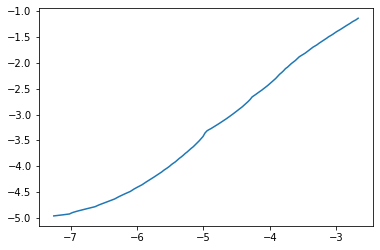

In [24]:
plt.plot(set_cr[0],set_cr[1])

In [25]:
print(dim_corr)

0.9210723247219351


## Lyapunov Exponents

The Lorenz attractor is a chaotic attractor. Therefore, we can compute the lypaunov exponents of the chaotic attractor. 

In [26]:
nolds.lyap_r(x, emb_dim=2)

/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 1250
  warnings.warn(msg.format(min_tsep), RuntimeWarning)
/Users/mariolavanga/Documents/GitHub/nonlinear_signals_analysis/env/lib/python3.7/site-packages/nolds/measures.py:28: RuntimeWarning: fitting mode 'RANSAC' requires the package sklearn, using 'poly' instead
  RuntimeWarning)


0.001765114203431724

In [27]:
nolds.lyap_e(x, emb_dim=2, matrix_dim=2)

array([-0.01261648, -0.14355873], dtype=float32)

## Sample Entropy

Estimation of entropy follows the concept of the correlation dimension.

In [28]:
sd_x       = np.std(x, ddof=1)
nolds.sampen(x, emb_dim=3, tolerance= 0.2*sd_x)

0.13175532084575534